# EDA IPYNB
#### IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data Sets

In [2]:
customers = pd.read_csv(r"./Customers.csv")
products = pd.read_csv(r"./Products.csv")
transactions = pd.read_csv(r"./Transactions.csv")

In [3]:
#customers.head()
#products.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#### MERGING DATASETS

In [4]:
df = pd.merge(transactions, customers, on='CustomerID')
df = pd.merge(df, products, on='ProductID')

In [5]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


1. TOP 10 POPULAR PRODUCTS

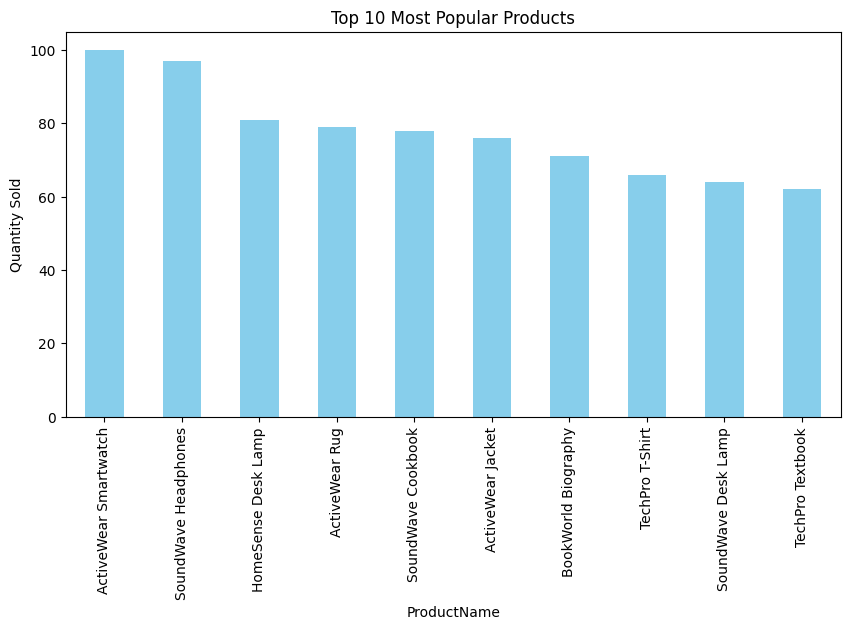

In [7]:
popular_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind='bar', figsize=(10, 5), color='skyblue', title="Top 10 Most Popular Products")
plt.ylabel("Quantity Sold")
plt.show()

2. CUSTOMER DISTRIBUTION BY REGION

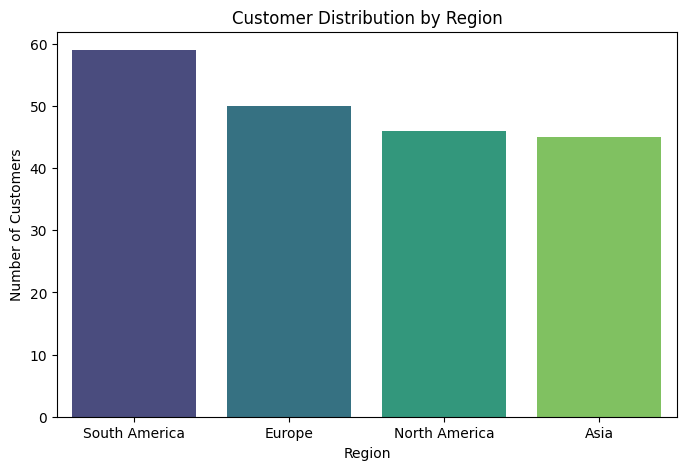

In [8]:
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis', hue=region_distribution.index , legend=False )
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

3. Customer Distribution BY Product Category

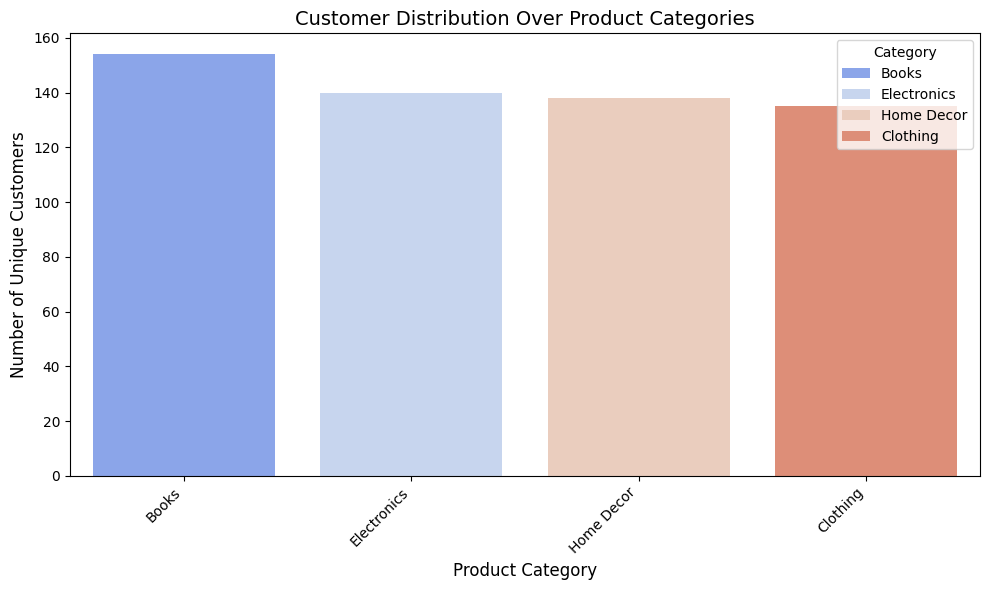

In [12]:
category_distribution = df.groupby('Category')['CustomerID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='coolwarm', hue=category_distribution.index , legend= True)
plt.title('Customer Distribution Over Product Categories', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

4. Total Sales By Region

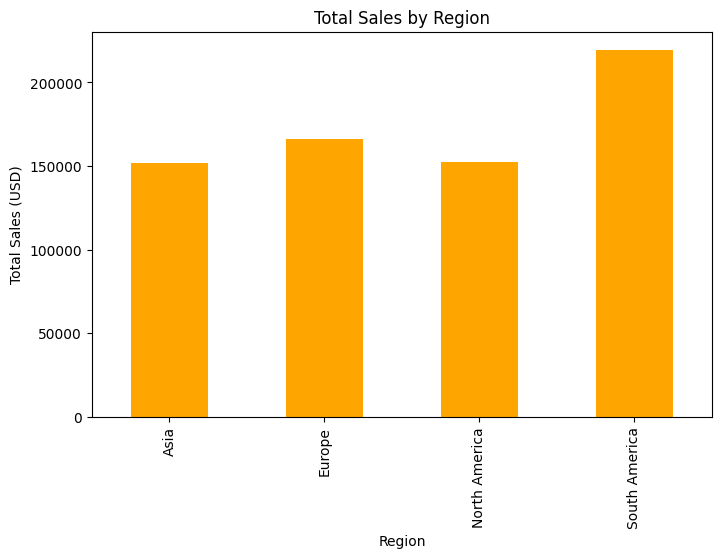

In [14]:
region_sales = df.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', figsize=(8, 5), color='orange', title="Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.show()

5. Revenue Contribution by Product Category

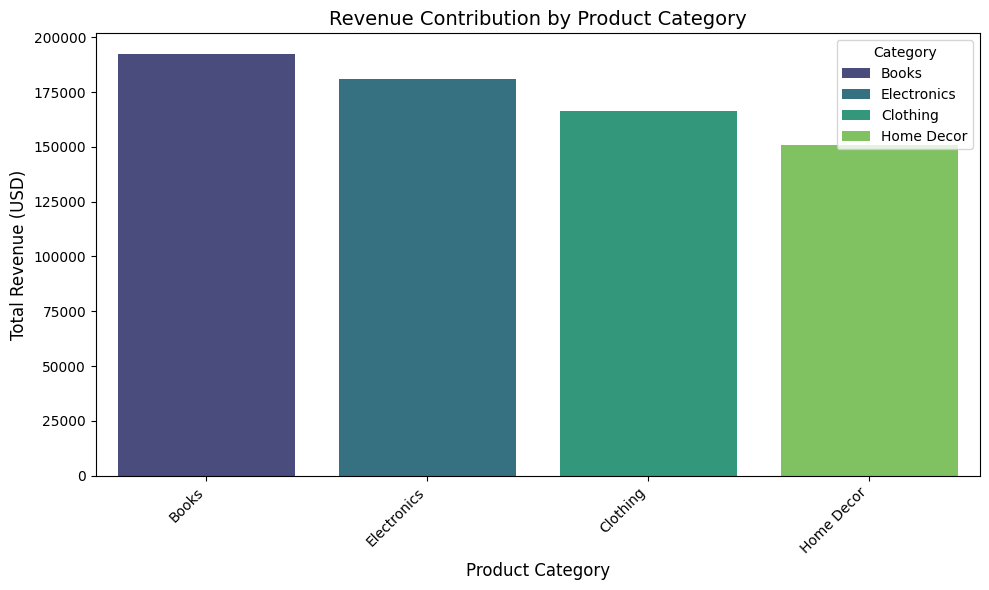

In [16]:
category_revenue = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis', hue=category_revenue.index ,legend=True)
plt.title('Revenue Contribution by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()